<a href="https://colab.research.google.com/github/jjhernandezruspg/aprendizaje_por_refuerzo/blob/main/Kilometros_a_Millas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [30]:
kilometers = np.array([0, 1, 5, 10, 20, 50, 100, 200, 500, 1000], dtype=float)
miles = np.array([0, 0.621371, 3.106855, 6.21371, 12.42742, 31.06855, 62.1371, 124.2742, 310.6855, 621.371], dtype=float)

In [31]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, input_shape=[1], activation='linear'),
    tf.keras.layers.Dense(units=8, activation='linear'),
    tf.keras.layers.Dense(units=1, activation='linear')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [33]:
print("Comenzando entrenamiento...")
historial = modelo.fit(kilometers, miles, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


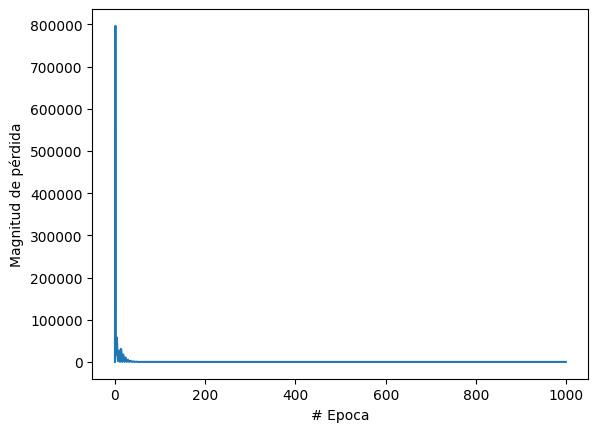

In [34]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [35]:
print("Hagamos una predicción!")
entrada = np.array([1000], dtype=np.float32)
resultado = modelo.predict(entrada)
print("El resultado es: " + str(resultado) + " millas.")

Hagamos una predicción!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
El resultado es: [[621.37103]] millas.


In [36]:
print("Variables internas del modelo")
print(modelo.get_weights())

Variables internas del modelo
[array([[ 0.14645809,  0.39312193,  0.37976137, -0.0399835 , -0.00334604,
        -0.18396619,  0.28680077, -0.13574491, -0.12875289, -0.12969257,
        -0.12025491, -0.05866765,  0.03710247,  0.2248002 , -0.23751242,
        -0.30356202]], dtype=float32), array([ 0.11604422,  0.2537559 ,  0.29965818, -0.4236605 , -0.07273243,
       -0.14717002,  0.5911516 ,  0.42447233, -0.41332665,  0.41139695,
       -0.26563415,  0.44064844,  0.18621393,  0.45665827, -0.25041333,
       -0.38736477], dtype=float32), array([[ 0.16246207, -0.8194136 , -0.04034857, -0.09531432,  0.7401587 ,
        -0.68345344, -0.4427203 , -0.43788028],
       [ 0.06942216, -1.0062776 , -0.35803488, -0.20227732, -0.0610218 ,
         0.02919659, -0.12754327, -0.5761882 ],
       [-0.07889638, -0.53606755, -0.5733323 , -0.4037727 , -0.11108683,
        -0.32618707, -0.29706982, -0.11511645],
       [ 0.8884297 ,  0.05522451, -0.07036545, -0.25138262, -0.19931446,
         0.5287626 ,  